Ryan Dunne
C00263405

Is climate change evident in Carlow?
Oak Park Weather Station 2004 - 2025
Link: https://www.met.ie/climate/available-data/historical-data

KEYS:
year:  -  Year	
month: -  Month	
rain:  -  Precipitation Amount (mm)	
meant: -  Mean Air Temperature (C)	
"maxtp: -  Maximum Air Temperature (C)	  "	
"mintp: -  Minimum  Air Temperature (C)	"	
mnmax: -  Mean Maximum Temperature (C)	
mnmin: -  Mean Minimum Temperature (C)	
gmin:  -  Grass Minimum Temperature (C)	
wdsp:  -  Mean Wind Speed (knot)	
mxgt:  -  Highest Gust (knot)	

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mly375.csv', skiprows=4)

The weather station dataset used had the following information for each month, there were some gaps in data for some months which were then removed

In [3]:
print(df)
df.columns

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt
0    2004      1    5.4   12.3   -5.9    8.5    2.4   82.7 -10.3   8.4     50
1    2004      3    6.6   15.9   -5.1   10.6    2.5   70.9  -9.7   9.0     57
2    2004      4    8.6   17.1    0.6   12.6    4.6   59.2  -3.6   8.4     43
3    2004      5   11.2   20.9    1.3   16.2    6.3   34.3  -3.0   6.2     39
4    2004      8   16.0   25.4    5.0   20.5   11.6  129.1   1.8   6.5     30
..    ...    ...    ...    ...    ...    ...    ...    ...   ...   ...    ...
244  2025      5   12.8   22.6    0.1   18.8    6.7   31.7  -4.3   5.9     36
245  2025      6   15.3   26.0    5.1   19.8   10.9   62.7   1.0   7.7     36
246  2025      7   17.3   30.2    8.1   21.6   12.9   59.8   3.0   6.4     38
247  2025      8   16.9   28.0    8.1   21.6   12.3   37.5   3.6   7.0     37
248  2025      9   12.9   20.9    0.9   17.3    8.5   87.5  -2.6   7.3     40

[249 rows x 11 columns]


Index(['year', 'month', 'meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'rain',
       'gmin', 'wdsp', 'maxgt'],
      dtype='object')

The annual Mean temperature was obtained by grouping the values of "meant" of each month if they shared the same year index

In [4]:
annualMeanTemp = df.groupby("year")["meant"].mean()
x = annualMeanTemp.index
y = annualMeanTemp.values

Initial Graph showing plotted points

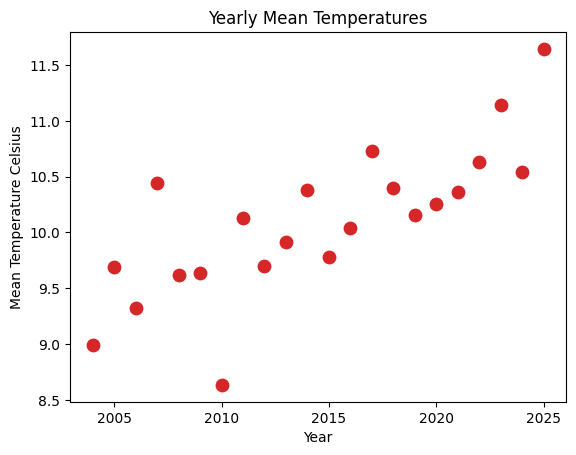

In [5]:

plt.scatter(x, y, color='tab:red', s=80)

plt.xlabel("Year")
plt.ylabel("Mean Temperature Celsius")
plt.title("Yearly Mean Temperatures")
plt.show()

Training the model & customising the graph

Text(0.5, 1.0, 'Yearly Mean Temperatures')

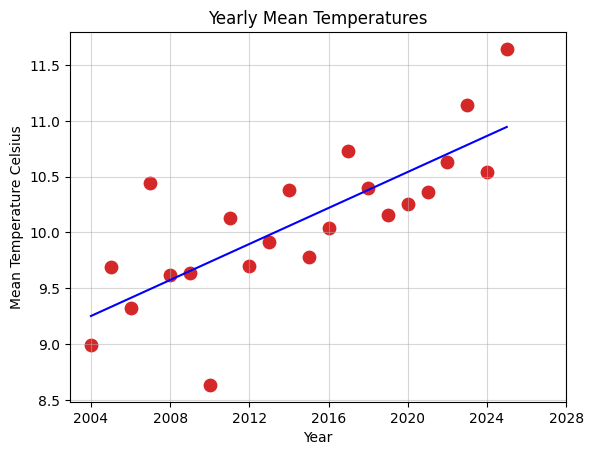

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

x = np.array(x)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(np.min(x), np.max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, color='tab:red', s=80)
plt.plot(xfit, yfit, color='blue')
plt.xticks([2004, 2008, 2012, 2016, 2020, 2024, 2028])
plt.grid(True, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Mean Temperature Celsius")
plt.title("Yearly Mean Temperatures")

In [7]:
print("Coefficient: ",model.coef_)

Coefficient:  [0.08068039]


Using linear regression, the data shows Carlow Town, on average is getting 0.081(Celsius) warmer each year